# Convex optimization

So far we've been thinking about reformulations of into mixed-integer linear optimization problems of the form

\begin{align}
\min \quad&f(x)\\
\text{s.t.} \quad& g(x) = 0, \\
& h(x) \leq 0.
\end{align}
where the functions $f$ and $g$ and $h$ are affine/linear.

A special class of nonlinear optimization problems are *convex* optimization problems where $f$ and $h$ are convex and $g$ is affine. Under some additional regularity assumptions, much of the duality theory from linear programming can be extended to convex optimization, and there exist efficient (polynomial-time) algorithms to solve these problems. With few exceptions, if your problem is convex, you can expect to be able to solve it efficiently.

## Detecting convexity

A function $f: \mathbb{R}^n \to \mathbb{R}$ is convex iff $f(\theta x + (1-\theta)y) \leq \theta f(x) + (1-\theta)f(y), \forall x,y \in \mathbb{R}^n \text{ and } \theta \in [0,1]$.

Given an arbitrary function $f$, detecting if $f$ is convex is [NP-Hard](http://web.mit.edu/~a_a_a/Public/Publications/convexity_nphard.pdf). So how do we know if a problem is convex?

A reasonable approach is to make sure that a model is built-up in a manner that lets us prove convexity by using a calculus of convex analysis; this is  **Disciplined Convex Programming** (DCP).

We start with operations that are known to be convex:
- Norms (why?)
- $\exp(\cdot)$
- $-\log(\cdot)$
- $x^p$ for $p \geq 1$ and $x \geq 0$.
- $1/x$ for $x > 0$
- $x^2$
- ...

Then add composition rules, e.g., $f(g(\cdot))$ is convex when $f$ is convex and
- $g$ is linear or affine
- $f$ is monotonic increasing and $g$ is convex

Also, $f_1+f_2$ and $\max\{f_1,f_2\}$ are convex when $f_1$ and $f_2$ are convex.

So our previous example of $x^2 - \log(x)$ is convex by these rules, because it is the sum of convex functions. So is $\max\{e^x,1/x\}$ ([plot](http://www.wolframalpha.com/input/?i=max%28exp%28x%29%2C1%2Fx%29+for+x+%3E+0)).

Note that these rules are *sufficient* but not *necessary* to prove convexity. 

There are a lot of existing materials on DCP which we won't try to reproduce here. Let's head over to http://dcp.stanford.edu/.

>**\[Exercise\]**: DCP Quiz

> Play the [DCP quiz](http://dcp.stanford.edu/quiz). Turn up the difficulty to hard for extra fun!

## Solving "DCP-compliant" problems

DCP rules are useful not just for proving convexity, but also for *solving* the problems.

For example, we (should) know that the following problem
\begin{align}
\min \quad& {||}x||_1\\
\text{s.t.} \quad& Ax = b, \\
& x \geq 0,
\end{align}

where $||x||_1 = \sum_i |x_i|$ can be solved by using linear programming.

Just introduce auxiliary variables $z$ and solve
\begin{align}
\min \quad& \sum_i z_i\\
\text{s.t.} \quad&z_i \geq x_i, \forall i\\
& z_i \geq -x_i, \forall i\\
& Ax = b, \\
& x \geq 0,
\end{align}

Similarly
\begin{align}
\min \quad& {||}x||_\infty\\
\text{s.t.} \quad& Ax = b, \\
& x \geq 0,
\end{align}

where $||x||_\infty = \max\{|x_1|,\cdots,|x_n|\}$ can be formulated as

\begin{align}
\min \quad& z\\
\text{s.t.} \quad&z \geq x_i, \forall i\\
& z \geq -x_i, \forall i\\
& Ax = b, \\
& x \geq 0,
\end{align}

(What do we do when $||\cdot||_1$ and $||\cdot||_\infty$ appear in convex constraints?)

Given these results, we might say that $||\cdot||_1$ and $||\cdot||_\infty$ are *LP-representable*, in a sense that can be made rigorous.

What about $||\cdot||_2$? It's SOCP (second-order conic programming) representable, since
$$
||x||_2 \leq t
$$
is precisely a second-order conic constraint that's already supported by Gurobi, CPLEX, MOSEK, ECOS, SCS, ...

What about $1/x$? It's also SOCP representable since
$$
1/x \leq t
$$
iff
$$
||(2,x-t)||_2 \leq x+t.
$$

It turns out that [A LOT](http://docs.mosek.com/generic/modeling-letter.pdf) of common convex functions are SOCP-representable.

Once we know how to represent basic operations using LPs or SOCPs, we can easily compose them. For example, we would represent

\begin{align}
\min \quad& \max\{||Cx-d||,1/x_1\}\\
\text{s.t.} \quad& Ax = b, \\
& x \geq 0,
\end{align}

as

\begin{align}
\min \quad& t\\
\text{s.t.} \quad& t \geq z_1 \\
&t \geq z_2\\
&{||}Cx-d|| \leq z_1\\
&{||}(2,x_1-z_2)|| \leq x_1+z_2\\
& Ax = b, \\
& x \geq 0,
\end{align}

and hand the problem off to Gurobi as an SOCP.

## DCP in summary

- Represent the model in a way that makes it easy to use DCP rules to prove convexity.
- Break down the individual pieces into parts that are representable using LP, SOCP, semidefinite programming, (or exponential cones)
- Use composition rules to *automatically* generate a complete formulation that can be given to existing solvers
- Note that derivatives aren't used anywhere!

The first implementation of DCP was [CVX](http://cvxr.com/cvx/) in MATLAB. More recently, it's been implemented in [cvxpy](https://github.com/cvxgrp/cvxpy) and [Convex.jl](https://github.com/JuliaOpt/Convex.jl).

# Quick convex prototyping

In [4]:
using Convex

## Variables

In [5]:
# Scalar variable
x = Variable()

Variable of
size: (1, 1)
sign: Convex.NoSign()
vexity: Convex.AffineVexity()

In [6]:
# (Column) vector variable
y = Variable(4)

Variable of
size: (4, 1)
sign: Convex.NoSign()
vexity: Convex.AffineVexity()

In [7]:
# Matrix variable
Z = Variable(4, 4)

Variable of
size: (4, 4)
sign: Convex.NoSign()
vexity: Convex.AffineVexity()

## Expressions
Convex.jl allows you to use a [wide variety of functions](http://convexjl.readthedocs.org/en/latest/operations.html) on variables and on expressions to form new expressions.

In [8]:
x + 2x

AbstractExpr with
head: +
size: (1, 1)
sign: Convex.NoSign()
vexity: Convex.AffineVexity()


In [9]:
e = y[1] + logdet(Z) + sqrt(x) + minimum(y)

AbstractExpr with
head: +
size: (1, 1)
sign: Convex.NoSign()
vexity: Convex.ConcaveVexity()


### Examine the expression tree

In [10]:
e.children[2]

AbstractExpr with
head: logdet
size: (1, 1)
sign: Convex.NoSign()
vexity: Convex.ConcaveVexity()


## Constraints

A constraint is convex if convex combinations of feasible points are also feasible. Equivalently, feasible sets are convex sets.

In other words, convex constraints are of the form

* `convexExpr <= 0`
* `concaveExpr >= 0`
* `affineExpr == 0`

In [11]:
x <= 0

Constraint:
<= constraint
lhs: Variable of
size: (1, 1)
sign: Convex.NoSign()
vexity: Convex.AffineVexity()
rhs: 0
vexity: Convex.AffineVexity()

In [12]:
x^2 <= sum(y)

Constraint:
<= constraint
lhs: AbstractExpr with
head: qol_elem
size: (1, 1)
sign: Convex.Positive()
vexity: Convex.ConvexVexity()

rhs: AbstractExpr with
head: sum
size: (1, 1)
sign: Convex.NoSign()
vexity: Convex.AffineVexity()

vexity: Convex.ConvexVexity()

In [13]:
M = Z 
for i = 1:length(y)
    M += rand(size(Z))*y[i]
end
M ⪰ 0

Constraint:
sdp constraint
expression: AbstractExpr with
head: +
size: (4, 4)
sign: Convex.NoSign()
vexity: Convex.AffineVexity()



## Problems

In [14]:
x = Variable()
y = Variable(4)
objective = 2*x + 1 - sqrt(sum(y))
constraint = x >= maximum(y)
p = minimize(objective, constraint)

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in print_joined(::IOContext{

Problem:
minimize AbstractExpr with
head: +
size: (1, 1)
sign: Convex.NoSign()
vexity: Convex.ConvexVexity()

subject to
Constraint:
>= constraint
lhs: Variable of
size: (1, 1)
sign: Convex.NoSign()
vexity: Convex.AffineVexity()
rhs: AbstractExpr with
head: maximum
size: (1, 1)
sign: Convex.NoSign()
vexity: Convex.ConvexVexity()

vexity: Convex.ConvexVexity()
current status: not yet solved

In [15]:
# solve the problem
solve!(p)
p.status

Base.AbstractIOBuffer{Array{UInt8,1}}}, ::Vararg{Any,N}) at ./deprecated.jl:30
 in show(::IOContext{Base.AbstractIOBuffer{Array{UInt8,1}}}, ::Convex.Problem) at /Users/yeesian/.julia/v0.5/Convex/src/utilities/show.jl:81
 in limitstringmime(::MIME{Symbol("text/plain")}, ::Convex.Problem) at /Users/yeesian/.julia/v0.5/IJulia/src/execute_request.jl:31
 in display_dict(::Convex.Problem) at /Users/yeesian/.julia/v0.5/IJulia/src/execute_request.jl:46
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/yeesian/.julia/v0.5/IJulia/src/execute_request.jl:206
 in eventloop(::ZMQ.Socket) at /Users/yeesian/.julia/v0.5/IJulia/src/eventloop.jl:8
 in (::IJulia.##13#19)() at ./task.jl:360
while loading /Users/yeesian/.julia/v0.5/IJulia/src/kernel.jl, in expression starting on line 31


Optimize a model with 11 rows, 11 columns and 29 nonzeros
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 5 rows and 3 columns
Presolve time: 0.00s
Presolved: 6 rows, 8 columns, 23 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 4
 AA' NZ     : 1.500e+01
 Factor NZ  : 2.100e+01
 Factor Ops : 9.100e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.20000000e+00  1.00000000e+00  4.99e-03 2.00e+00  2.72e-01     0s
   1   1.06111542e+00  9.83347049e-01  5.64e-09 1.05e+00  1.20e-01     0s
   2   7.44842024e-01  9.06531320e-01  8.67e-10 5.80e-01  4.68e-02     0s
   3   5.66162545e-01  7.27141450

:Optimal

In [16]:
x.value

0.24993603982319862

In [17]:
# can evaluate expressions directly
evaluate(objective)

1×1 Array{Float64,2}:
 0.5

# Application 1: Elastic Net Regularization

Taken from https://github.com/JuliaOpt/Convex.jl/blob/master/examples/Convex.jl_intro_ISMP2015.ipynb

In [20]:
# Make the Convex.jl module available
using Convex
using SCS # first order splitting conic solver [O'Donoghue et al., 2014]
set_default_solver(SCSSolver(verbose=0)) # could also use Gurobi, Mosek, CPLEX, ...

# Generate random problem data
m = 50;  n = 100
A = randn(m, n)
x♮ = sprand(n, 1, .5) # true (sparse nonnegative) parameter vector
noise = .1*randn(m)    # gaussian noise
b = A*x♮ + noise      # noisy linear observations

# Create a (column vector) variable of size n.
x = Variable(n)

# nonnegative elastic net with regularization
λ = 1
μ = 1
problem = minimize(norm(A * x - b)^2 + λ*norm(x)^2 + μ*norm(x, 1), 
                   x >= 0)

# Solve the problem by calling solve!
solve!(problem)

println("problem status is ", problem.status) # :Optimal, :Infeasible, :Unbounded etc.
println("optimal value is ", problem.optval)

INFO: Precompiling module SCS.


problem status is Optimal
optimal value is 38.17113835699274


# Application 2: Support Vector Machines (SVM)

[Support vector machines](http://en.wikipedia.org/wiki/Support_vector_machine) are a popular model in machine learning for classification. We'll use this example to illustrate the basic use of Convex.jl.

The basic problem is that we are given a set of N points $x_1,x_2,\ldots, x_N \in \mathbb{R}^n$ and labels $y_1, y_2, \ldots y_n \in \{-1,+1\}$. And we want to find a hyperplane of the form $w^Tx-b = 0$ that *separates* the two classes, i.e. $w^Tx_i - b \geq 1$ when $y_i = +1$ and $w^Tx_i - b \leq -1$ when $y_i = -1$. This condition can be written as $y_i(w^Tx_i - b) \geq 1, \forall\, i$.

Such a hyperplane will not exist in general if the data overlap, so instead we'll just try to minimize violations of the constraint $y_i(w^Tx_i - b) \geq 1, \forall\, i$ by adding a penalty when it is violated. The optimization problem can be stated as
$$
\min_{w,b} \sum_{i=1}^N \left[\max\{0, 1 - y_i(w^Tx_i - b)\}\right] + \gamma ||w||_2^2
$$
Note that we penalize the norm of $w$ in order to guarantee a unique solution.

Now let's write our own SVM solver!

In [23]:
using Distributions
using PyPlot
using Convex
using ECOS

INFO: Recompiling stale cache file /Users/yeesian/.julia/lib/v0.5/ECOS.ji for module ECOS.


In [69]:
# Function to generate some random test data
function gen_data(N)
    # for +1 data, symmetric multivariate normal with center at (1,2)
    pos = rand(MvNormal([1.0,2.0],1.0),N)
    # for -1 data, symmetric multivariate normal with center at (-1,1)
    neg = rand(MvNormal([-1.0,1.0],1.0),N)
    x = [pos neg]
    y = vcat(fill(+1,N),fill(-1,N))
    return x,y
end

gen_data (generic function with 1 method)

Let's see what the data look like.

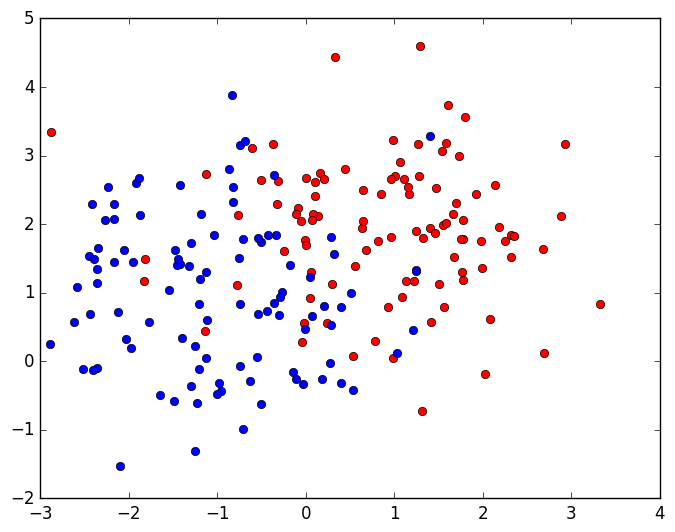

In [70]:
x,y = gen_data(100)
plot(x[1,1:100], x[2,1:100], "ro", x[1,101:200], x[2,101:200], "bo");

Now we translate the optimization problem into Convex.jl form.

In [71]:
const γ = 0.005
function svm_convex(x,y)
    n = size(x,1) # problem dimension
    N = size(x,2) # number of points
    w = Variable(n)
    b = Variable()
    
    problem = minimize( γ*sumsquares(w) + sum(max(1-y.*(x'*w-b),0)))
    solve!(problem, ECOSSolver())
    return evaluate(w), evaluate(b)
end

svm_convex (generic function with 1 method)

And the solution?

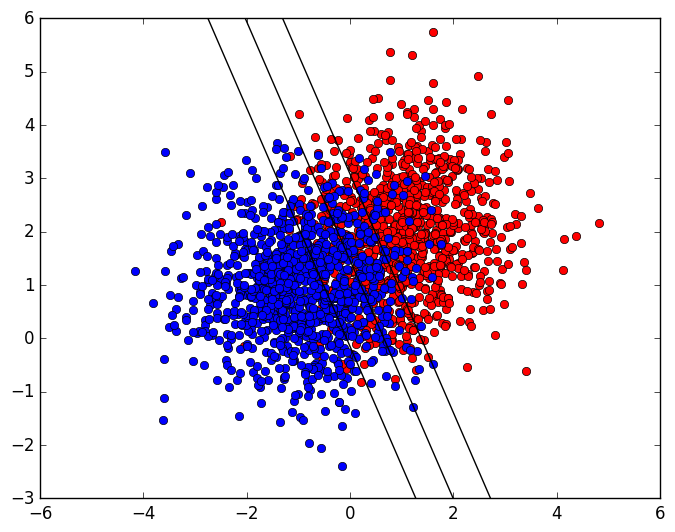

(w,b) = (
[1.38353; 0.618608],

0.9065403292031802)

ECOS 2.0.5 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +4.114e+02  +3.232e+03  +2e+04  2e-01  1e+01  1e+00  4e+00    ---    ---    3  2  - |  -  - 
 1  +6.279e+02  +1.850e+03  +1e+04  5e-02  5e+00  2e+00  3e+00  0.4750  2e-01   2  1  1 |  0  0
 2  +6.672e+02  +9.931e+02  +4e+03  1e-02  1e+00  9e-01  1e+00  0.7123  1e-01   2  1  1 |  0  0
 3  +6.619e+02  +7.107e+02  +7e+02  1e-03  2e-01  2e-01  2e-01  0.8490  2e-02   2  1  1 |  0  0
 4  +6.617e+02  +6.779e+02  +2e+02  5e-04  7e-02  5e-02  6e-02  0.7066  6e-02   2  1  1 |  0  0
 5  +6.618e+02  +6.685e+02  +9e+01  2e-04  3e-02  2e-02  2e-02  0.6399  9e-02   2  1  1 |  0  0
 6  +6.618e+02  +6.642e+02  +3e+01  7e-05  1e-02  6e-03  8e-03  0.6934  6e-02   2  1  1 |  0  0
 7  +6.619e+02  +6.629e+02  +1e+01  3e-05  5e-03  2e-03  4e-03  0.6541  1e-01   1  1  1 | 

In [72]:
N = 1000
x,y = gen_data(N)

plot(x[1,1:N], x[2,1:N], "ro", x[1,(N+1):2N], x[2,(N+1):2N], "bo");
w,b = svm_convex(x,y)

@show w,b

xmin, xmax = xlim()
ymin, ymax = ylim()
y1 = (1+b-w[1]*xmin)/w[2]
y2 = (1+b-w[1]*xmax)/w[2]
plot([xmin,xmax], [y1,y2], "k-");
y1 = (-1+b-w[1]*xmin)/w[2]
y2 = (-1+b-w[1]*xmax)/w[2]
plot([xmin,xmax], [y1,y2], "k-");
y1 = (b-w[1]*xmin)/w[2]
y2 = (b-w[1]*xmax)/w[2]
ylim(ymin,ymax)
plot([xmin,xmax], [y1,y2], "k-");

>**\[Exercise\]**: Sensitivity

> Increase the separation between the positive and negative data by modifying the means in ``gen_data``. How does the solution change?


>**\[Exercise\]**: JuMP version

> Translate the Convex.jl model into a JuMP model with linear constraints and a quadratic objective. For example, ``sum_squares(w)`` becomes ``sum{w[i]^2,i=1:n}``. Hint: the formulation is given on Wikpedia. (You may want to use ``IpoptSolver`` since ``ECOSSolver`` supports second-order conic constraints but won't directly accept quadratic objectives.)

### Discussion

- Convex.jl vs. JuMP
- Derivative-based nonlinear vs. automatic transformation to LP/SOCP/conic form